# 1) LOADING MODULES AND DATASETS

In [1]:
##Loading modules 
import warnings
warnings.filterwarnings('ignore')

import numpy as np ## array processing
import pandas as pd ## dataframe processing
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder ##encoding
from sklearn.preprocessing import LabelEncoder ##encoding
from sklearn.utils import resample ## DataSampling for unbalanced data
from sklearn.compose import ColumnTransformer, make_column_transformer ##ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline ## Pipeline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV ##cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from lightgbm import LGBMClassifier


import eli5 ##names from transformer
import xgboost as xgbs ## Boosting -Xgboost
import seaborn as sns ##Visualization
import matplotlib.pyplot as plt ## Visualization
import plotly.express as px ##Visualiztion
from yellowbrick import classifier, features, regressor ## ML Visualization
import pickle
import re

In [2]:
df_train = pd.read_csv(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Credit/Credit_train.csv')
df_train['source'] = 'train'
df_test = pd.read_csv(r'/Users/Humza Ali/OneDrive/Documents/Data/Practise/Credit/Credit_test.csv')
df_test["source"] = 'test'
df = pd.concat([df_train, df_test], ignore_index = True)

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [4]:
df.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN,test
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN,test
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN,test
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN,test
351036,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No,NaN,test


# 2) BIVARIATE ANALYSIS FEATURE ENGINEERING AND EDA

## 1) CHECKING AND CLEANING DATASETS

In [5]:
df.shape ## Checking No of rows and column in datasets

(351037, 12)

In [6]:
df.dtypes # Checking datatypes of datasets

ID                      object
Gender                  object
Age                      int64
Region_Code             object
Occupation              object
Channel_Code            object
Vintage                  int64
Credit_Product          object
Avg_Account_Balance      int64
Is_Active               object
Is_Lead                float64
source                  object
dtype: object

In [7]:
df.describe() ## Checking Mean STD of Datasets

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,245725.000000
mean,43.860716,46.924244,1.130141e+06,0.237208
std,14.841932,32.329303,8.569530e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
df.nunique(axis=0,dropna=True) ## Checking Unique value in datasets

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

In [9]:
df.isnull().sum() ## Checking any Null or Missing Values in datasets

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [10]:
df["Credit_Product"] = df["Credit_Product"].fillna("NA")

In [11]:
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [12]:
df["Is_Active"].replace(["Yes", "No"],[1,0],inplace = True)
df["Is_Active"] = df["Is_Active"].astype(float)

In [13]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0.0,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0.0,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1.0,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0.0,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0.0,0.0,train


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       351037 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  float64
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 32.1+ MB


## 2) DATA VISUALIZATION

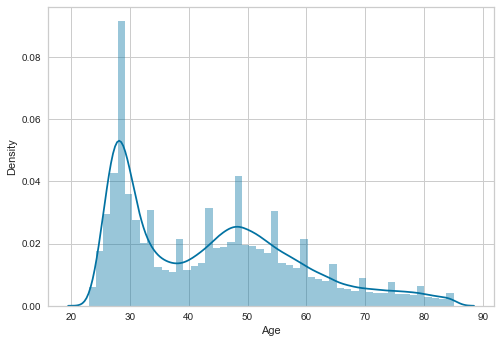

In [15]:
sns.distplot(df["Age"]);

###### Observation: Age is slightly skewed towards left

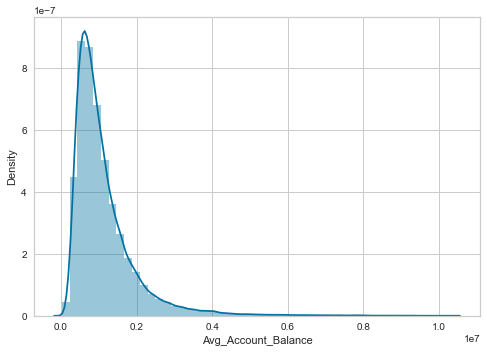

In [16]:
sns.distplot(df["Avg_Account_Balance"]);

###### Observations: Low Avg Account Balance is Skewed towards Left

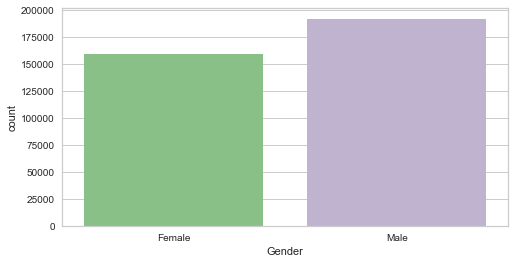

In [17]:
plt.figure(figsize = (8,4))
sns.countplot(df["Gender"], palette = "Accent")
plt.show()

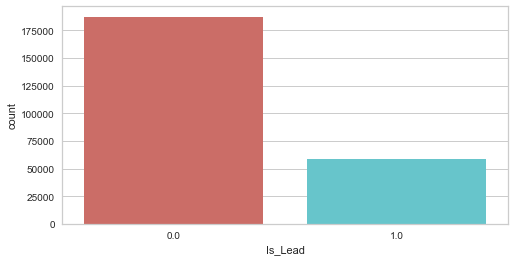

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


In [18]:
target = "Is_Lead"
plt.figure(figsize = (8,4))
sns.countplot(df[target], palette = "hls")
plt.show()
print(df[target].value_counts())

###### Observation: The data is Highly Imbalanced Need to be balance before Algorithm

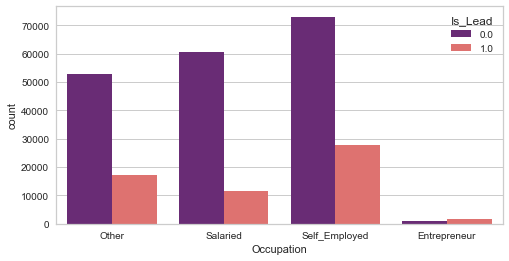

In [19]:
plt.figure(figsize = (8,4))
sns.countplot(x = "Occupation", hue = "Is_Lead", data = df, palette = "magma")
plt.show()

<Figure size 576x288 with 0 Axes>

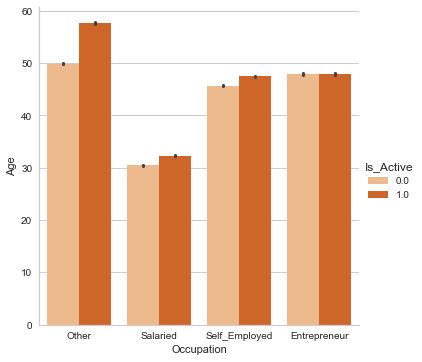

In [20]:
plt.figure(figsize = (8,4))
sns.catplot(y = "Age",x = "Occupation", hue = "Is_Active", data = df, kind = 'bar' ,palette = "Oranges")
plt.show()

In [21]:
cat_col = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product']

le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
df_2 = df
df_2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0.0,0.0,train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0.0,0.0,train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1.0,0.0,train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0.0,0.0,train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0.0,0.0,train


In [22]:
df_train = df_2.loc[df_2["source"]=="train"]
df_test = df_2.loc[df_2["source"]=="test"]
df_1 = df_train

In [23]:
df_1.drop(columns = ["ID","source"], inplace = True)
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0.0,0.0
1,0,30,27,2,0,32,1,581988,0.0,0.0
2,0,56,18,3,2,26,1,1484315,1.0,0.0
3,1,34,20,2,0,19,1,470454,0.0,0.0
4,0,30,32,2,0,33,1,886787,0.0,0.0


## 3) DATA PREPARATION

In [24]:
df_majority = df_1[df_1["Is_Lead"] == 0]
df_minority = df_1[df_1["Is_Lead"] == 1]

print( "The Majority class value are", len(df_majority))
print("The minority class value are", len(df_minority))
print("The ratio of both classes are", len(df_majority)/len(df_minority))

The Majority class value are 187437
The minority class value are 58288
The ratio of both classes are 3.215704776283283


In [25]:
df_majority_undersampled = resample(df_majority, replace = True, n_samples = len(df_minority), random_state = 0)
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

df_undersampled["Is_Lead"].value_counts()

0.0    58288
1.0    58288
Name: Is_Lead, dtype: int64

In [26]:
df_1 = df_undersampled
print(" The undersamples class values count is:", len(df_undersampled))
print(" The ratio of both classes are", len(df_undersampled[df_undersampled["Is_Lead"]==0])/len(df_undersampled[df_undersampled["Is_Lead"]==1]))

 The undersamples class values count is: 116576
 The ratio of both classes are 1.0


In [27]:
xc = df_1.drop(columns = ['Is_Lead'])
yc = df_1[['Is_Lead']]

In [28]:
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,32,1,2,20,0,1056750,1.0,1.0
15,1,33,18,3,1,69,0,517063,1.0,1.0
16,0,46,18,1,2,97,2,2282502,0.0,1.0
17,0,59,33,1,2,15,2,2384692,0.0,1.0
20,1,44,19,3,1,19,2,1001650,0.0,1.0


In [29]:
sc = StandardScaler()
df_xc = pd.DataFrame(sc.fit_transform(xc), columns = xc.columns)

## 4) DATA MODELLING

In [30]:
def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max = 0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = 42, test_size = 0.2, stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc, model_c.predict(test_xc))
    if roc_score > roc_scr_max:
        roc_scr_max = roc_score
        final_model = model_c
        mean_acc = cross_val_score(final_model,df_xc, yc, cv=5, scoring = "accuracy").mean()
        std_dev = cross_val_score(final_model,df_xc, yc, cv=5, scoring = "accuracy").std()
        cross_val = cross_val_score(final_model,df_xc, yc, cv=5, scoring = "accuracy")
        print("*"*50)
        print("Result for model : ", names, '\n',
              "max roc score correspond to random state ", roc_scr_max, '\n',
              "Mean accuracy score is : ", mean_acc, '\n',
              "Std deviation score is : ", std_dev, '\n',
              "Cross validation score is : ", cross_val)
        print(f"roc_auc_score: {roc_score}")
        print("*"*50)

In [31]:
accuracy_scr_max = []
models = []
std_dev = []
roc_auc = []
mean_acc = []
cross_val = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('GausianNB', GaussianNB()))

for names, model_c in models:
    max_accuracy_scr(names,model_c,df_xc,yc)

**************************************************
Result for model :  Logistic Regression 
 max roc score correspond to random state  0.727315712597147 
 Mean accuracy score is :  0.6696918411779096 
 Std deviation score is :  0.0030322593046897828 
 Cross validation score is :  [0.67361469 0.66566588 0.66703839 0.67239974 0.66974051]
roc_auc_score: 0.727315712597147
**************************************************
**************************************************
Result for model :  Random Forest 
 max roc score correspond to random state  0.8799024764841853 
 Mean accuracy score is :  0.8113677083313788 
 Std deviation score is :  0.002206442862762215 
 Cross validation score is :  [0.80905816 0.81059404 0.81140896 0.81230967 0.8131246 ]
roc_auc_score: 0.8799024764841853
**************************************************
**************************************************
Result for model :  Decision Tree 
 max roc score correspond to random state  0.7403928632698575 
 Mean accura

###### Observation: Random Forest is performing better

## RANDOM FOREST CLASSIFIER

In [32]:
parameters = {"n_estimators": [1,10,100]}
rf_clf = RandomForestClassifier()
clf =GridSearchCV(rf_clf,parameters,cv =5, scoring = "roc_auc")
clf.fit(df_xc, yc)
print("Best Parameter : ",clf.best_params_, "\nBest Estimator: ",clf.best_estimator_, "\nBest Score: ",clf.best_score_)

Best Parameter :  {'n_estimators': 100} 
Best Estimator:  RandomForestClassifier() 
Best Score:  0.8809146129963288


In [33]:
rf_clf = RandomForestClassifier(n_estimators= 100, random_state =42)
max_accuracy_scr("RandomForest Classifier", rf_clf,df_xc,yc)

**************************************************
Result for model :  RandomForest Classifier 
 max roc score correspond to random state  0.879415808805665 
 Mean accuracy score is :  0.8115392510996895 
 Std deviation score is :  0.0008997445291505284 
 Cross validation score is :  [0.81180305 0.81136607 0.81106584 0.81037958 0.81308171]
roc_auc_score: 0.879415808805665
**************************************************


In [34]:
xc_train,xc_test,yc_train,yc_test = train_test_split(df_xc,yc,random_state = 80, test_size = 0.2, stratify = yc)
rf_clf.fit(xc_train,yc_train)
yc_predict = rf_clf.predict(xc_test)

 ROC_AUC score is  0.8804566893762799
 Accuracy score is  0.8127466117687425
 Precison score is  0.8397949673811743
 Recall score is  0.7729456167438669
 F1 score is  0.8049848132928354
 Classification report 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.84      0.77      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316



<AxesSubplot:>

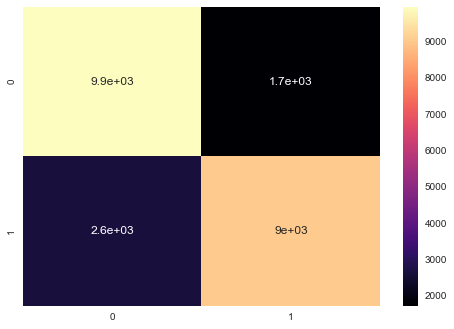

In [35]:
pred_pb = rf_clf.predict_proba(xc_test)[:, 1]
Fpr, Tpr, thresholds = roc_curve(yc_test, pred_pb, pos_label= True)
auc = roc_auc_score(yc_test, pred_pb)

print(" ROC_AUC score is ", auc)
print(" Accuracy score is ", accuracy_score(yc_test, yc_predict))
print(" Precison score is ", precision_score(yc_test, yc_predict))
print(" Recall score is ", recall_score(yc_test, yc_predict))
print(" F1 score is ", f1_score(yc_test, yc_predict))
print(" Classification report \n", classification_report(yc_test, yc_predict))

cnf = confusion_matrix(yc_test, yc_predict)
sns.heatmap(cnf, annot = True, cmap = "magma")

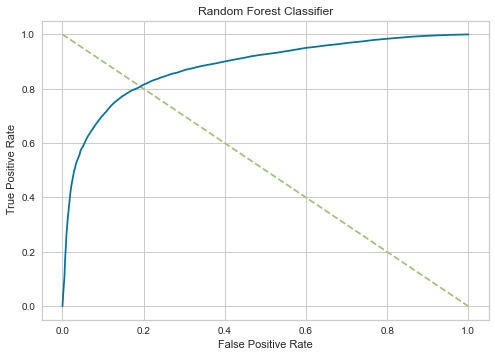

In [36]:
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr, Tpr)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

## XgBOOST CLASSIFIER

In [37]:
clf2 = xg.XGBClassifier(class_weight = 'balanced').fit(xc_train, yc_train)
class_weight.compute_class_weight('balanced', np.unique(yc_train), yc_train['Is_Lead'])
xg_pred =clf2.predict(xc_test)

[11:17:05] WARNING: ..\src\learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:17:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 ROC_AUC score is  0.8804566893762799
 Accuracy score is  0.8033968090581575
 Precison score is  0.8246741325500275
 Recall score is  0.7706296105678504
 F1 score is  0.7967364313586378
 Classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.82      0.77      0.80     11658

    accuracy                           0.80     23316
   macro avg       0.80      0.80      0.80     23316
weighted avg       0.80      0.80      0.80     23316



<AxesSubplot:>

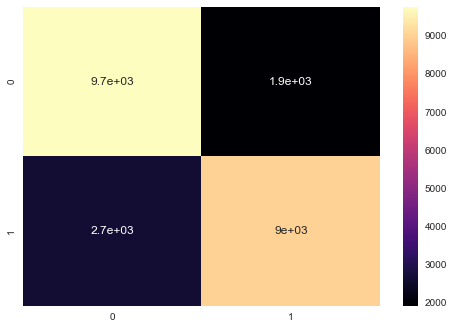

In [38]:
xg_pred_2 = clf2.predict_proba(xc_test)[:, 1]
Fpr, Tpr, thresholds = roc_curve(yc_test, xg_pred_2, pos_label= True)
auc = roc_auc_score(yc_test, pred_pb)

print(" ROC_AUC score is ", auc)
print(" Accuracy score is ", accuracy_score(yc_test, xg_pred))
print(" Precison score is ", precision_score(yc_test, xg_pred))
print(" Recall score is ", recall_score(yc_test, xg_pred))
print(" F1 score is ", f1_score(yc_test, xg_pred))
print(" Classification report \n", classification_report(yc_test, xg_pred))

cnf = confusion_matrix(yc_test, xg_pred)
sns.heatmap(cnf, annot = True, cmap = "magma")

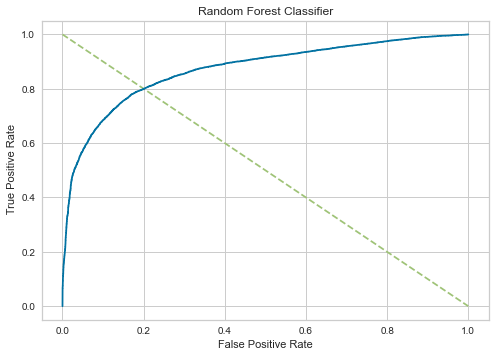

In [39]:
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr, Tpr)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

## LGBM with STRATIFICATION FOLD

In [40]:
def cross_val(xc, yc, model, params,folds = 10):
    skf = StratifiedKFold(n_splits = folds, shuffle = True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(xc, yc)):
        print(f"Fold: {fold}")
        xc_train, yc_train = xc.iloc[train_idx], yc.iloc[train_idx]
        xc_test, yc_test = xc.iloc[test_idx], yc.iloc[test_idx]
        
        model_c = model(**params)
        model_c.fit(xc_train, yc_train, eval_set = [(xc_test, yc_test)], early_stopping_rounds=100, verbose = 300)
        
        pred_y = model_c.predict_proba(xc_test)[:, 1]
        roc_score = roc_auc_score(yc_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
        
    return model_c

In [41]:
lgb_params = {'learning_rate':0.045, 'n_estimators':1000, 'max_bin':84, 'num_leaves':10, 'max_depth':20, 'reg_alpha':8.457, 'reg_lambda':6.853, 'subsample':0.749}
lgb_model = cross_val(xc, yc, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.433821
[600]	valid_0's binary_logloss: 0.433498
Early stopping, best iteration is:
[599]	valid_0's binary_logloss: 0.433487
roc_auc_score: 0.8748638095718249
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.434881
[600]	valid_0's binary_logloss: 0.43445
Early stopping, best iteration is:
[569]	valid_0's binary_logloss: 0.43442
roc_auc_score: 0.8755631159104413
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.431872
[600]	valid_0's binary_logloss: 0.43125
[900]	valid_0's binary_logloss: 0.430984
Did not meet early stopping. Best iteration is:
[992]	valid_0's binary_logloss: 0.43087
roc_auc_score: 0.8770543494099475
--------------------------------------------------
Fold: 3
Tra

In [42]:
clf3 = lgb_model.fit(xc_train,yc_train)
lg_pred =clf3.predict(xc_test)

 ROC_AUC score is  0.8804566893762799
 Accuracy score is  0.8039114770972723
 Precison score is  0.8269053330872855
 Recall score is  0.7687424944244295
 F1 score is  0.7967638691322901
 Classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.83      0.77      0.80     11658

    accuracy                           0.80     23316
   macro avg       0.81      0.80      0.80     23316
weighted avg       0.81      0.80      0.80     23316



<AxesSubplot:>

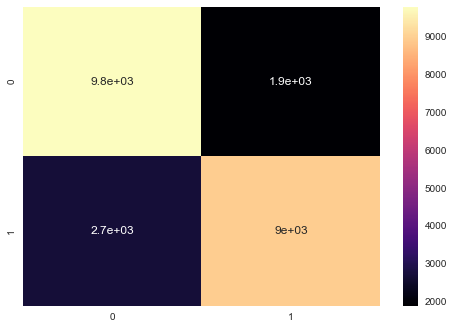

In [43]:
lg_pred_2 = clf3.predict_proba(xc_test)[:, 1]
Fpr, Tpr, thresholds = roc_curve(yc_test, lg_pred_2, pos_label= True)
auc = roc_auc_score(yc_test, pred_pb)

print(" ROC_AUC score is ", auc)
print(" Accuracy score is ", accuracy_score(yc_test, lg_pred))
print(" Precison score is ", precision_score(yc_test, lg_pred))
print(" Recall score is ", recall_score(yc_test, lg_pred))
print(" F1 score is ", f1_score(yc_test, lg_pred))
print(" Classification report \n", classification_report(yc_test, lg_pred))

cnf = confusion_matrix(yc_test, lg_pred)
sns.heatmap(cnf, annot = True, cmap = "magma")

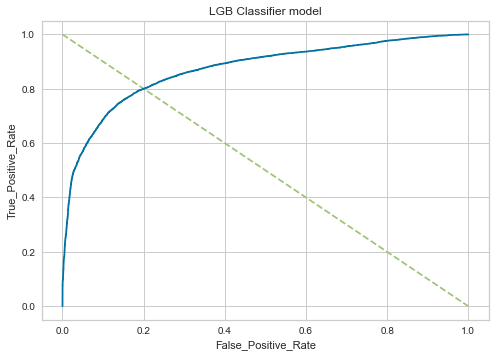

In [44]:
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("LGB Classifier model")
plt.show()

## PREDICTION

In [45]:
df_3 = df_test

In [46]:
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN,test
245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN,test
245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN,test
245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN,test
245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN,test


In [50]:
df_3 = df_3.drop(columns = ['source'])

In [51]:
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [52]:
xc_pred = df_3.drop(columns = ["ID", "Is_Lead"])

In [55]:
sc = StandardScaler()
df_xc_pred = pd.DataFrame(sc.fit_transform(xc_pred), columns = xc_pred.columns)

In [56]:
lead_pred_xg = clf2.predict_proba(df_xc_pred)[:, 1]
lead_pred_lgb = clf3.predict_proba(df_xc_pred)[:, 1]
lead_pred_rf = rf_clf.predict_proba(df_xc_pred)[:, 1]

In [57]:
#Dataframe for lead prediction
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Is_Lead"])
lead_pred_xg= pd.DataFrame(lead_pred_xg,columns=["Is_Lead"])
lead_pred_rf= pd.DataFrame(lead_pred_rf,columns=["Is_Lead"])

In [58]:
df_test = df_test.reset_index()
df_test.head()

,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN,test
1,245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN,test
2,245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN,test
3,245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN,test
4,245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN,test


In [59]:
#Saving ID  and prediction to csv file for XG Model
df_pred_xg=pd.concat([df_test["ID"],lead_pred_xg],axis=1,ignore_index=True)
df_pred_xg.columns = ["ID","Is_Lead"]
print(df_pred_xg.head())
df_pred_xg.to_csv("Credit_Card_Lead_Predictions_final_XG.csv",index=False)

#Saving ID  and prediction to csv file for LGB Model
df_pred_lgb=pd.concat([df_test["ID"],lead_pred_lgb],axis=1,ignore_index=True)
df_pred_lgb.columns = ["ID","Is_Lead"]
print(df_pred_lgb.head())
df_pred_lgb.to_csv("Credit_Card_Lead_Predictions_final_LGB.csv",index=False)

#Saving ID  and prediction to csv file for RF model
df_pred_rf=pd.concat([df_test["ID"],lead_pred_rf],axis=1,ignore_index=True)
df_pred_rf.columns = ["ID","Is_Lead"]
print(df_pred_rf.head())
df_pred_rf.to_csv("Credit_Card_Lead_Predictions_final_RF.csv",index=False)

         ID   Is_Lead
0  VBENBARO  0.096735
1  CCMEWNKY  0.942843
2  VK3KGA9M  0.127288
3  TT8RPZVC  0.052260
4  SHQZEYTZ  0.057762
         ID   Is_Lead
0  VBENBARO  0.144043
1  CCMEWNKY  0.939953
2  VK3KGA9M  0.144847
3  TT8RPZVC  0.077729
4  SHQZEYTZ  0.060617
         ID  Is_Lead
0  VBENBARO     0.17
1  CCMEWNKY     0.97
2  VK3KGA9M     0.09
3  TT8RPZVC     0.12
4  SHQZEYTZ     0.09


## 6) OVERALL REMARKS

###### Data contained both categorical and numerical data. Converted categories to numerical for EDA analysis.
###### Also conducted visual analysis to observe following:

###### IndentActive customers are more in salaried,self_employed and others as compared to entrepreneur in last 3 months.
###### Data is skewed towards left in Avg_Account_Balance
###### Target Variable is imbalanced and needed to be corrected for proper modelling.
###### Dataset was balanced by using undersampling technique.

###### Random Forest Classifier:

###### Found RandomForest model had the highest AUC score(0.91) among various base models.
###### However, as the predicted probability was meaned in RF model upto 2 decimal places the resultant AUC score with test data was found to be ~ 0.85

###### XG Boost Classifier:

###### To further boost the accuracy XG Boost method was used and AUC score of 0.87 was found with the training data.
###### However, XG boost auc score with test data dropped to ~ 0.86 due to overfitting issues.

###### LGBM Classifier with stratified cross-validation:

###### To solve overfitting issues, LGBM model with 10-fold cross-validation was used and AUC score 0.874 with training data.
###### Model performed very well with test data and provided auc score of ~0.871
###### Hence, final model is selected as LGBM model as it is most consistent model with highest AUC score.

## SAVING THE MODEL

In [60]:
import joblib
#save the model as a pickle in a file 
joblib.dump(lgb_model,'lgb_model.pkl')

['lgb_model.pkl']